![presentation.gif](https://media2.giphy.com/media/13Nc3xlO1kGg3S/giphy.gif)

# **TOP  VIEWS  VIDEOS  WALL**

In [1]:
from IPython.display import HTML, display
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob

files = [i for i in glob.glob('/Volumes/HD/school/Research Practicum/Trending-YouTube-Scraper-master/output/*.{}'.format('csv'))]
dfs = list()
for csv in files:
    df = pd.read_csv(csv)
    df['country'] = csv[86:88]
    dfs.append(df)

my_df = pd.concat(dfs)
# my_df = my_df[(my_df['country'] =='US') | (my_df['country'] =='GB')| (my_df['country'] =='CA') | (my_df['country'] =='DE') | (my_df['country'] =='FR')]
# my_df = my_df.rename(columns={'publishedAt': 'publish_time', 'categoryId': 'category_id'})
my_df = my_df.dropna()
to_int = ['view_count']
for column in to_int:
    my_df[column] = my_df[column].astype(int)
my_df = my_df.drop_duplicates('video_id',keep='last').sort_values('view_count',ascending=False)
most_views_thumb = my_df['thumbnail_link'].head(100).reset_index()['thumbnail_link']

ROW = 10
COLUMN = 10
tempHTML = ''
innerHTML = '<div style="block">'
    
for r in range(ROW):
    rowHTML = ''
    for c in range(COLUMN):
        #if c != COLUMN-1:
        tempHTML = '<img src="' + most_views_thumb[c*10+r] + '"style="float:left;width:80px;height:80px;margin:0">'
        rowHTML += tempHTML
        #else:
            #tempHTML = '<img src="' + most_views_thumb[c*10+r] + '"style="float:left;width:80px;height:80px;margin:0">'
            #rowHTML += tempHTML
    innerHTML += rowHTML #'<div>' +rowHTML + '</div>'
innerHTML += '</div>'
display(HTML(innerHTML))

#my_df.head()

# **Deep Analysis on Trending Youtube Video Statistic**
This Notebook will walk you through some data exploration and deeper analysis on Youtube Trending Video Statistic in between countries like US, Canada, United Kingdom, France and Germany.
We will go through 2 session in this notebook:
## 1. Overview of statistics
## 2. Analysis
> ### How long usually a video can trend in different countries? 
> ### How many likes, dislikes, views and comments get by different countries? 
> ### Correlation of trending video in between countries
> ### Videos from which category has longer trend?
> ### Correlation between Days of Publish to Trend v/s Trending Duration
> ### Users like videos from which CATEGORY the most?
> ### What is the ratio of Likes-Dislikes and Views-Comments in different categories?
> ### What's the tags in the most negative and most positive category? What's the most discuss words for Science & Technology?
> ### To Be Continued......

# Importing Libraries

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
# Any results you write to the current directory are saved as output.

## Import all the CSV files (US, CA, DE, GB, FR)

In [3]:


files = [i for i in glob.glob('/Volumes/HD/school/Research Practicum/Trending-YouTube-Scraper-master/output/*.{}'.format('csv'))]
sorted(files)



['/Volumes/HD/school/Research Practicum/Trending-YouTube-Scraper-master/output/21.01.03_BR_videos.csv',
 '/Volumes/HD/school/Research Practicum/Trending-YouTube-Scraper-master/output/21.01.03_CA_videos.csv',
 '/Volumes/HD/school/Research Practicum/Trending-YouTube-Scraper-master/output/21.01.03_DE_videos.csv',
 '/Volumes/HD/school/Research Practicum/Trending-YouTube-Scraper-master/output/21.01.03_FR_videos.csv',
 '/Volumes/HD/school/Research Practicum/Trending-YouTube-Scraper-master/output/21.01.03_GB_videos.csv',
 '/Volumes/HD/school/Research Practicum/Trending-YouTube-Scraper-master/output/21.01.03_IN_videos.csv',
 '/Volumes/HD/school/Research Practicum/Trending-YouTube-Scraper-master/output/21.01.03_JP_videos.csv',
 '/Volumes/HD/school/Research Practicum/Trending-YouTube-Scraper-master/output/21.01.03_KR_videos.csv',
 '/Volumes/HD/school/Research Practicum/Trending-YouTube-Scraper-master/output/21.01.03_MX_videos.csv',
 '/Volumes/HD/school/Research Practicum/Trending-YouTube-Scraper

## Combine all the statistics from different regions
Let's see what we got in this combined sheet.

In [4]:
dfs = list()
for csv in files:
    df = pd.read_csv(csv, index_col='video_id')
    df['country'] = csv[86:88]
    dfs.append(df)

my_df = pd.concat(dfs)

# my_df = my_df[(my_df['country'] =='US') | (my_df['country'] =='GB')| (my_df['country'] =='CA') | (my_df['country'] =='DE') | (my_df['country'] =='FR')]

my_df = my_df.rename(columns={'publishedAt': 'publish_time', 'categoryId': 'category_id'})

my_df.head(10)

title  \
video_id                                                         
_wpfCfwyWZo                  VOLTAMOS PRA CASA - Muita emoção!   
zF4FFjHK4Bs  NOW UNITED DESENHOU MINHA MAKE! (Noah, Any, Jo...   
xtcVwuauVV0     ATEEZ(에이티즈) - ‘불놀이야 (I'm The One)’ Official MV   
aQh_S7GzWYA  SALGUEIRO 2 X 3 BAHIA | MELHORES MOMENTOS | 1ª...   
EpXoNPwkRX4  SPORT 1 x 1 SAMPAIO CORRÊA | GOLS E MELHORES M...   
i_z3wPMo9Js                                 PORQUE ME SEPAREI?   
pDUih7LbL-E  FREE FIRE - GRANDE FINAL NFA LEGENDS SEASON 2 ...   
4c3nsjWr17Q           Atlanta Hawks x Miami Heat - NBA AO VIVO   
Pi6Rdsl7-ic  GRÊMIO 0 X 1 PALMEIRAS | MELHORES MOMENTOS | F...   
T3bUdpJKvzQ               MONSTER HUNTER é bom? - Vale Crítica   

                     publish_time                 channelId      channelTitle  \
video_id                                                                        
_wpfCfwyWZo  2021-02-28T23:30:01Z  UCPa8vElq5yFo3wV6BY6HqoQ     Simone Mendes   
zF4FFjHK4Bs  2021-02-28T14:00:31Z  UCoTM-vvs2hnv2mCvzNJ5uXA    Franciny Ehlke   
xtcVwuauVV0  2021-03-01T09:00:00Z  UCQdq-lqPEq_yZ_wP_kuVB9Q  KQ ENTERTAINMENT   
aQh_S7GzWYA  2021-02-28T23:27:44Z  UCP-vp1zdHOa9k2hN_nMT9TA  Copa do Nordeste   
EpXoNPwkRX4  2021-03-01T01:41:01Z  UCP-vp1zdHOa9k2hN_nMT9TA  Copa do Nordeste   
i_z3wPMo9Js  2021-02-28T15:00:15Z  UCuolNZhe3t6OSoDzk5j-tvw         Backstage   
pDUih7LbL-E  2021-02-28T23:26:55Z  UCIVnGR9XPef8boJWJHfQAiA       NFA CHANNEL   
4c3nsjWr17Q  2021-03-01T03:50:23Z  UCsiCOcr5SZAWlJMfcw9P__w        NBA Brasil   
Pi6Rdsl7-ic  2021-03-01T02:21:12Z  UCgCKagVhzGnZcuP9bSMgMCg                ge   
T3bUdpJKvzQ  2021-02-28T22:52:25Z  UCE8deXi-Eea3SuEV1Q1L4ug        Super Oito   

             category_id trending_date  \
video_id                                 
_wpfCfwyWZo           22      21.01.03   
zF4FFjHK4Bs           22      21.01.03   
xtcVwuauVV0           10      21.01.03   
aQh_S7GzWYA           17      21.01.03   
EpXoNPwkRX4           17      21.01.03   
i_z3wPMo9Js            2      21.01.03   
pDUih7LbL-E           20      21.01.03   
4c3nsjWr17Q           17      21.01.03   
Pi6Rdsl7-ic           17      21.01.03   
T3bUdpJKvzQ           24      21.01.03   

                                                          tags  view_count  \
video_id                                                                     
_wpfCfwyWZo  simone e simaria|nascimento|parto|cesaria|hosp...     1437578   
zF4FFjHK4Bs  FRANCINY EHLKE|FRANCINNY|FRANCINI|FRANCINE|ELK...      732528   
xtcVwuauVV0  KQ|케이큐|에이티즈|ATEEZ|HONGJOONG|SEONGHWA|YUNHO|YEO...     1286798   
aQh_S7GzWYA  copa do nordeste|nordestão|lampions league|lam...       89571   
EpXoNPwkRX4  copa do nordeste|nordestão|lampions league|lam...       54252   
i_z3wPMo9Js                                             [none]      240884   
pDUih7LbL-E  liga nfa|nfa|liga|free fire|garena|lbff|copa f...      207891   
4c3nsjWr17Q  nba|nba ao vivo|vivo|ao vivo|jogo|partida|link...      107441   
Pi6Rdsl7-ic  esporte|esportes|ge|ge.globo|globo esporte|glo...      590738   
T3bUdpJKvzQ  monster hunter|monster|hunter|monstros|gigante...      114478   

              likes  dislikes  comment_count  \
video_id                                       
_wpfCfwyWZo  167724       745           3647   
zF4FFjHK4Bs   98845      2106           5032   
xtcVwuauVV0  405536      1896          74766   
aQh_S7GzWYA    3177       103            415   
EpXoNPwkRX4    2205        58            532   
i_z3wPMo9Js   25796       914           2484   
pDUih7LbL-E   22960       184             34   
4c3nsjWr17Q   12908        26              0   
Pi6Rdsl7-ic   19689       460           2961   
T3bUdpJKvzQ   25124       134           1316   

                                             thumbnail_link  \
video_id                                                      
_wpfCfwyWZo  https://i.ytimg.com/vi/_wpfCfwyWZo/default.jpg   
zF4FFjHK4Bs  https://i.ytimg.com/vi/zF4FFjHK4Bs/default.jpg   
xtcVwuauVV0  https:/

## Reformat the date time and removed the incompleted rows

In [5]:
my_df['trending_date'] = pd.to_datetime(my_df['trending_date'],errors='coerce', format='%y.%d.%m')
my_df['publish_time'] = pd.to_datetime(my_df['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S%fZ')

my_df = my_df[my_df['trending_date'].notnull()]
my_df = my_df[my_df['publish_time'].notnull()]

my_df = my_df.dropna(how='any',inplace=False, axis = 0)

my_df.insert(4, 'publish_date', my_df['publish_time'].dt.date)
my_df['publish_time'] = my_df['publish_time'].dt.time

my_df_full = my_df.reset_index().sort_values('trending_date').set_index('video_id')
my_df = my_df.reset_index().sort_values('trending_date').drop_duplicates('video_id',keep='last').set_index('video_id')
my_df[['publish_date','publish_time']].head()

publish_date     publish_time
video_id                                 
4l-wCVL1thU   2021-02-25  13:00:00.400000
neVTYheC4v0   2021-02-24  03:00:02.400000
q9pvGgnyyWw   2021-02-21  08:00:00.900000
cfv_9gp7h_M   2021-02-21  22:00:00.600000
r1mNZlJjBWA   2021-02-19  13:15:00.100000

We keep two set of data here:
1. ***my_df*** (which only keep the last entry if duplicated because it carries latest stat)
2. ***my_df_full*** ( full set of combined data, keep for later use)

## Insert category column

In [6]:
my_df['category_id'] = my_df['category_id'].astype(str)
my_df_full['category_id'] = my_df['category_id'].astype(str)

category_id = {}

with open('/Volumes/HD/school/Research Practicum/Trending-YouTube-Scraper-master/output/US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        category_id[category['id']] = category['snippet']['title']

my_df.insert(4, 'category', my_df['category_id'].map(category_id))
my_df_full.insert(4, 'category', my_df_full['category_id'].map(category_id))
category_list = my_df['category'].unique()
category_list

array(['Music', 'Comedy', 'Howto & Style', 'Entertainment',
       'People & Blogs', 'Film & Animation', 'Sports', 'Travel & Events',
       'Gaming', 'News & Politics', 'Education', 'Autos & Vehicles',
       'Pets & Animals', 'Science & Technology', 'Nonprofits & Activism'],
      dtype=object)

In [7]:
import dataframe_image as dfi
pd.set_option('display.max_colwidth', 10)
dfi.export(my_df.head(25), 'df_styled.png')


# Analysis : How long usually a video can trend in different countries?
The statistic provided has a key features to reflect how long a video trending which is the **number of appearances**. The greater the number of apperances indicate the long-last the video trend is. From here we can see that United Kingdom's list has the most long trended Youtube videos (Top 5 in the list is from GB). 

In [8]:
fre_df = pd.DataFrame(my_df_full.groupby([my_df_full.index,'country']).count()['title'].sort_values(ascending=False)).reset_index()
fre_df.head(), fre_df.tail()

(    video_id country  title
 0  CMbQv6...      KR      7
 1  aGrRfA...      KR      7
 2  pPagqB...      KR      7
 3  mDDITj...      KR      7
 4  xiOrru...      KR      7,
         video_id country  title
 24038  kiqEEr...      GB      1
 24039  Hk4eMI...      DE      1
 24040  Hk4eMI...      CA      1
 24041  aOq49e...      JP      1
 24042  DX7Wax...      GB      1)

In [9]:
fre_df1=fre_df.head(25).style.set_properties(**{'background-color': 'lightblue','border-color': 'white',
                           'color': 'black','text-align': 'left'})

dfi.export(fre_df1, 'how_long_trend_by_country_data.png')

### Let's visualize the stats above using line graphs

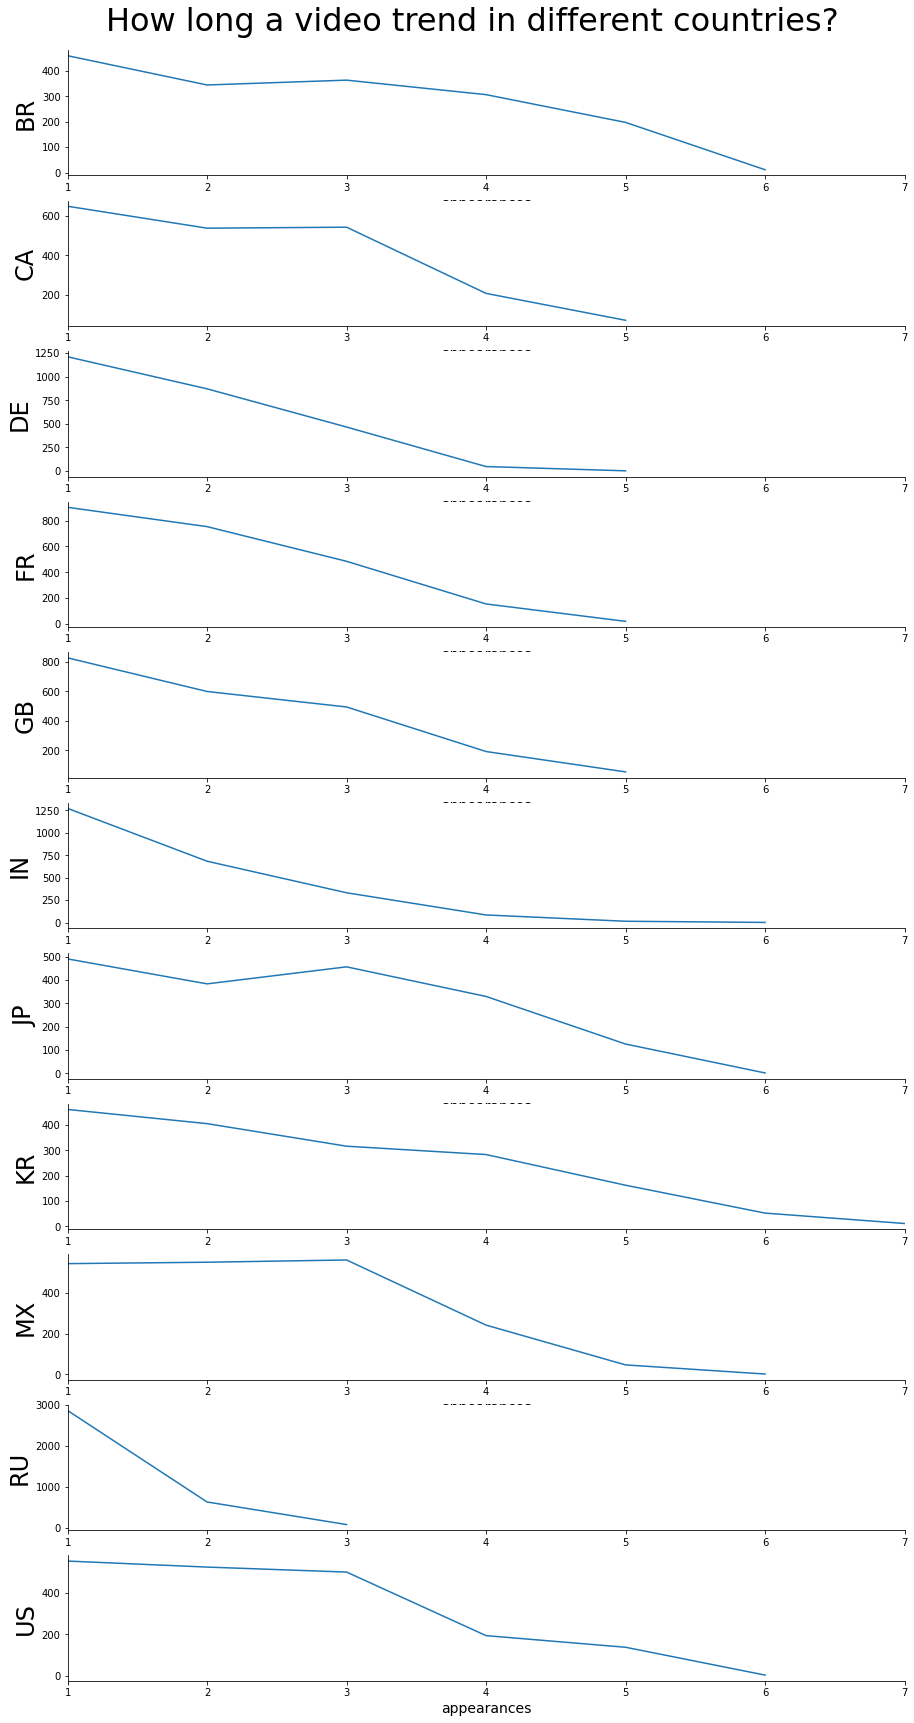

In [10]:
video_list,max_list = list(),list()
country_list = my_df.groupby(['country']).count().index

for c in country_list:
    video_list.append(fre_df[fre_df['country']==c]['title'].value_counts().sort_index())
    max_list.append(max(fre_df[fre_df['country']==c]['title'].value_counts().sort_index().index))

fig, [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10] = plt.subplots(nrows=11,figsize=(15, 30))
st = fig.suptitle("How long a video trend in different countries?", fontsize=32)
st.set_y(0.9)
for i, pt in enumerate([ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]):
    pt.plot(video_list[i].index, video_list[i])
    pt.spines['right'].set_visible(False)
    pt.spines['top'].set_visible(False)
    pt.set_xlabel("appearances",fontsize=14)
    pt.set_ylabel(country_list[i],fontsize=24)
    pt.axes.set_xlim(1, max(max_list))

# Tweak spacing between subplots to prevent labels from overlapping
plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0)

### Observation :
From the line graphs above we can see that United Kingdom has numbers of enduring video in trend follow by US and Canada. In contrast, both France and Germany have very few video can last long in trending with max of 5 appearances in statistics.

## Ratio of Youtube Trending Videos in 5 countries
Since we have combined statistics from multiple countries, it's good to have a look on the number and ratio of videos we have in different countries. In this plot we keep only last entry for duplicated videos. That's why we can clearly observe that **the country with the most long-trending video end up having lesser videos**.

country
BR    1562
CA     711
DE    1994
FR    2028
GB    1303
IN    2301
JP    1732
KR    1653
MX    1763
RU    3450
US    1230
Name: title, dtype: int64

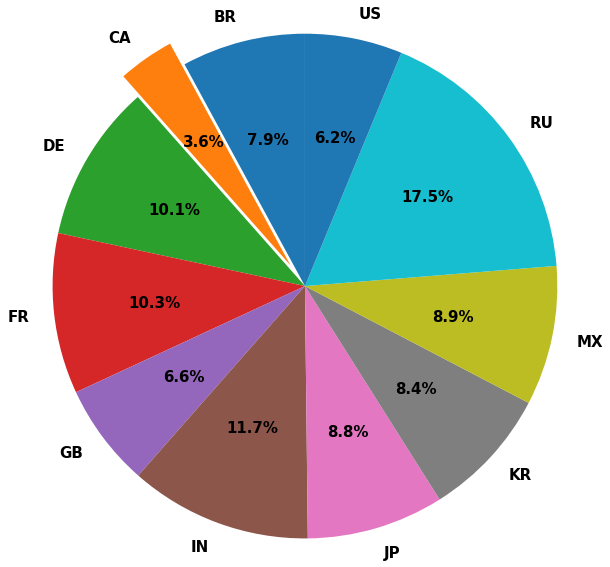

In [11]:
labels = my_df.groupby(['country']).count().index
sizes = my_df.groupby(['country']).count()['title']
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots(figsize=(10,10))
ax.pie(sizes, labels=labels, autopct='%1.1f%%',textprops={'fontsize': 15, 'weight':'bold'},
        shadow=False, explode=explode, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
sizes


# Analysis : How many likes, dislikes, views and comments get by different countries? 

In [12]:
import matplotlib.pyplot as plt

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

cmap = get_cmap(len(country_list))

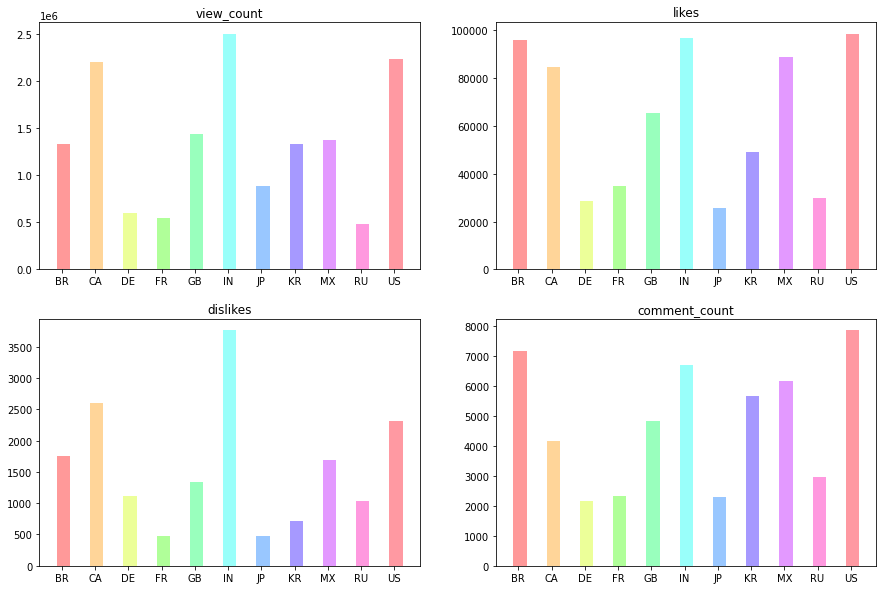

In [13]:
to_int = ['view_count', 'likes', 'dislikes', 'comment_count']
for column in to_int:
    my_df[column] = my_df[column].astype(int)
    
measures = list()
n_groups = len(country_list)
for i, typ in enumerate(to_int):
    measure = list()
    for c in country_list:
        measure.append(my_df[my_df['country']==c][typ].agg('sum')/len(my_df[my_df['country']==c].index.unique()))
    measures.append(measure)

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(ncols=2,nrows=2, figsize=(15,10))

index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.4
error_config = {'ecolor': '0.3'}

for i, axs in enumerate([[ax1, ax2], [ax3, ax4]]):
    for j, ax in enumerate(axs):
        ax.bar(index + (bar_width), measures[(i+j)+i], bar_width*4,
                alpha=opacity, color=cmap(index),
                error_kw=error_config)
        ax.set_title(to_int[(i+j)+i])
        ax.set_xticks(index + bar_width / 2)
        ax.set_xticklabels(country_list)


**Observation:**
Obviously, four of the graphs share the similar trend in numbers. One possible reason to this is due to the video's trending duration. Enduring trending videos have the advantages in getting more views, likes, dislikes and comments.

# Analysis : Correlation of trending video in between countries


> **Question : Does the video trending in one country will trend in other countries too? If yes,how much  do they correlate to each other? **

 Let's find out the answer!

In [14]:
fre_df1 = fre_df[(fre_df['country'] =='US') | (fre_df['country'] =='GB')| (fre_df['country'] =='CA') | (fre_df['country'] =='DE') ]

corr_list = pd.DataFrame(fre_df['video_id'].unique(), columns=['video_id'])
for country_code in fre_df['country'].unique():
    corr_list[country_code] = 0
corr_list['total']=0
corr_list=corr_list.set_index('video_id')
#print new_list
for index , item in corr_list.iterrows():
    #print index
    total = 0
    for i ,row in fre_df[fre_df['video_id'] == index][['country','title']].iterrows():
        total += row['title']
        corr_list.loc[[index],[row['country']]] = row['title']
    corr_list.loc[[index],['total']] = total

In [15]:
# pd.options.display.max_rows = 14972
pd.options.display.max_rows = 10

corr_list.head(9)

KR  US  BR  IN  MX  JP  GB  CA  FR  DE  RU  total
video_id                                                     
CMbQv68...   7   0   0   0   0   0   0   0   0   0   0      7
aGrRfAs...   7   0   0   0   0   0   0   0   0   0   0      7
pPagqBg...   7   0   0   0   0   0   0   0   0   0   0      7
mDDITjj...   7   0   0   0   0   0   0   0   0   0   0      7
xiOrruF...   7   0   0   0   0   0   0   0   0   0   0      7
ic33KKZ...   7   0   0   0   0   0   0   0   0   0   0      7
YZ9kLOz...   7   0   0   0   0   0   0   0   0   0   0      7
WnMLsNt...   7   0   0   0   0   0   0   0   0   0   0      7
m30V-t5...   7   0   0   0   0   0   0   0   0   0   0      7

Suprisingly the answer is **YES**. They do coexist in multiple list.
Next, let's see how much do they correlate to each other.

## Plot the Heatmaps of Correlation

<ipython-input-16-bd91f8b945ff>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels, minor=False, fontsize=15)
<ipython-input-16-bd91f8b945ff>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, minor=False, fontsize=15)


GB        US        CA        DE        FR        IN        KR  \
GB  1.000000  0.455281  0.477260  0.160266 -0.000457 -0.056024 -0.058886   
US  0.455281  1.000000  0.690841  0.117581  0.001229 -0.060852 -0.050884   
CA  0.477260  0.690841  1.000000  0.137824  0.078965 -0.055947 -0.046009   
DE  0.160266  0.117581  0.137824  1.000000 -0.010823 -0.071652 -0.074799   
FR -0.000457  0.001229  0.078965 -0.010823  1.000000 -0.083033 -0.062837   
..       ...       ...       ...       ...       ...       ...       ...   
KR -0.058886 -0.050884 -0.046009 -0.074799 -0.062837 -0.077761  1.000000   
RU -0.098718 -0.096185 -0.097294 -0.112238 -0.108392 -0.126607 -0.104432   
JP -0.060399 -0.054546 -0.057248 -0.076094 -0.063975 -0.081456 -0.040482   
BR -0.010283  0.005047  0.003660 -0.027160 -0.018088 -0.066971 -0.041203   
MX -0.022444  0.025356 -0.008024 -0.039139 -0.029307 -0.075078 -0.053733   

          RU        JP        BR        MX  
GB -0.098718 -0.060399 -0.010283 -0.022444  
US -0.096185 -0.054546  0.005047  0.025356  
CA -0.097294 -0.057248  0.003660 -0.008024  
DE -0.112238 -0.076094 -0.027160 -0.039139  
FR -0.108392 -0.063975 -0.018088 -0.029307  
..       ...       ...       ...       ...  
KR -0.104432 -0.040482 -0.041203 -0.053733  
RU  1.000000 -0.112219 -0.090553 -0.102826  
JP -0.112219  1.000000 -0.047555 -0.058287  
BR -0.090553 -0.047555  1.000000  0.004028  
MX -0.102826 -0.058287  0.004028  1.000000  

[11 rows x 11 columns]

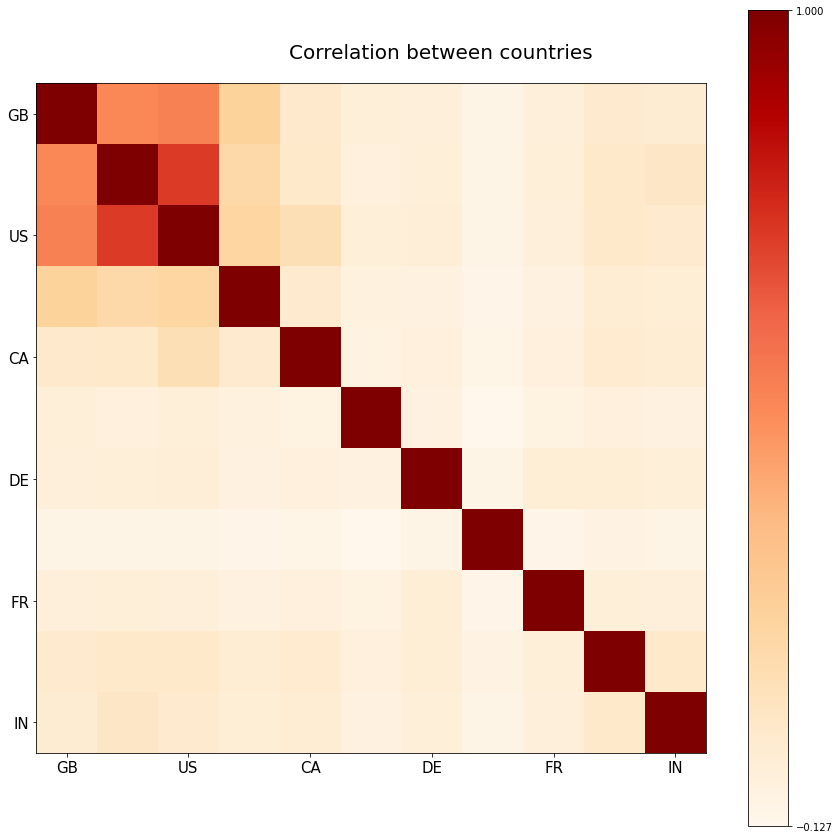

In [16]:
countries = ['GB', 'US', 'CA', 'DE', 'FR', 'IN', 'KR', 'RU', 'JP', 'BR', 'MX'] #looking at correlations between these countries
corr_matrix = corr_list[countries].corr()

fig, ax = plt.subplots(figsize=(15,15))
fig.suptitle('Correlation between countries', fontsize=20).set_y(0.85)
heatmap = ax.imshow(corr_matrix, interpolation='nearest', cmap=cm.OrRd)

# making the colorbar on the side
cbar_min = corr_matrix.min().min()
cbar_max = corr_matrix.max().max()
cbar = fig.colorbar(heatmap, ticks=[cbar_min, cbar_max])

# making the labels
labels = ['']
for column in countries:
    labels.append(column)
#print labels
ax.set_yticklabels(labels, minor=False, fontsize=15)
ax.set_xticklabels(labels, minor=False, fontsize=15)
corr_matrix

Here we got the heatmap of correlation of YouTube Trending Videos between countries. Not surprisingly, the video from **United Kingdom, US and Canada** is highly correlate to each other compare to **Germany and France**. This might due to the sharing of common language in these countries. As compare, Germany and France seems like more isolate where they did not follow the trend from English speaking countries (Just my personal opinion by observing the heatmap). This can also explain why United Kingdom has the highest number in long-trend videos, as it is contributed by multiple countries at the same time.

# Analysis : Users like videos from which **CATEGORY** the most?

## From United Kingdom Users : 

Text(0.5, 1.0, 'Catogories of Trend Videos in United Kingdom')

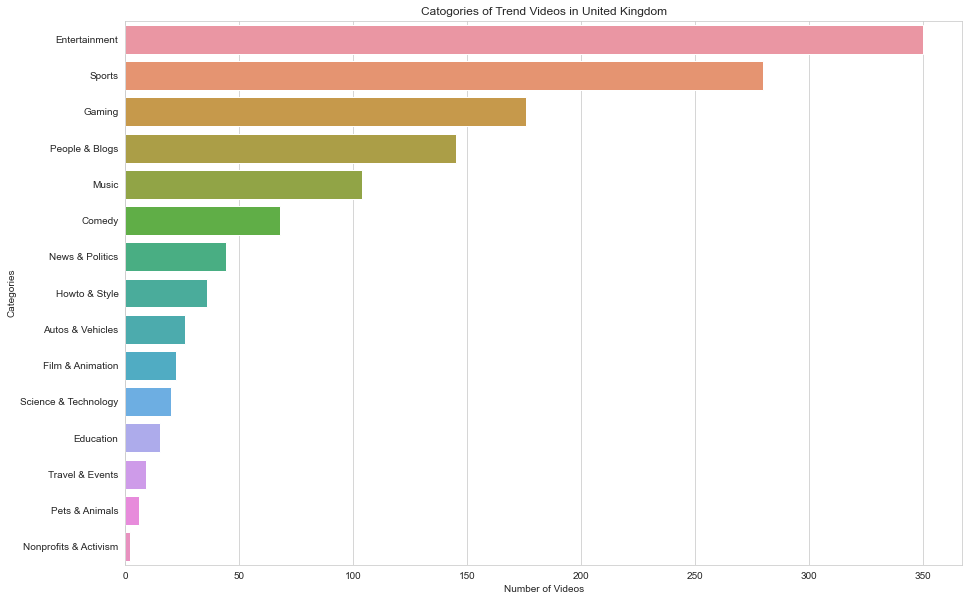

In [17]:
cat_df_gb = my_df[my_df['country']=='GB']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_gb['index'],x=cat_df_gb['category'], data=cat_df_gb,orient='h')
plt.xlabel("Number of Videos")## From United Kingdom users : 
plt.ylabel("Categories")
plt.title("Catogories of Trend Videos in United Kingdom")

## From US Users : 

Text(0.5, 1.0, 'Catogories of Trend Videos in US')

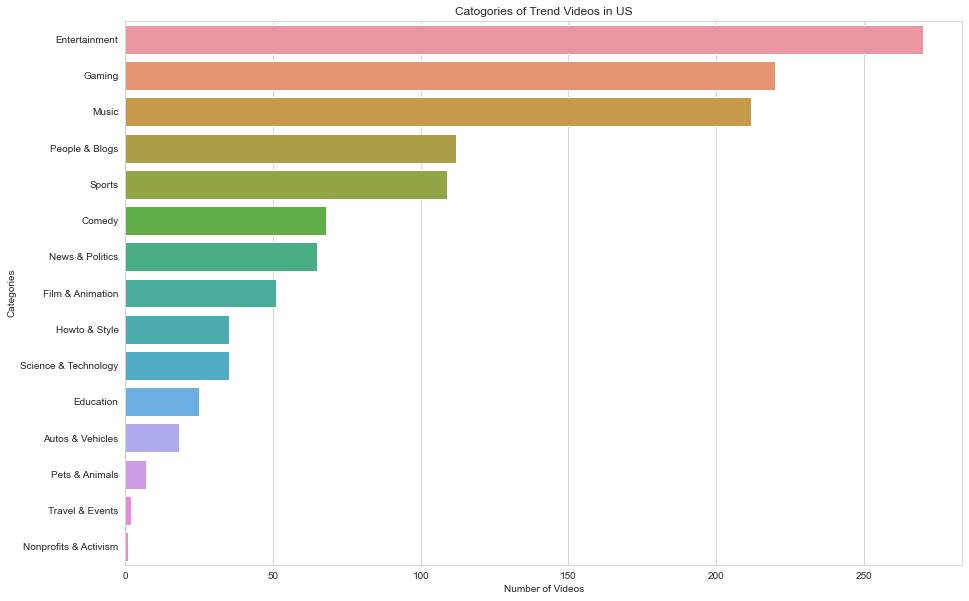

In [18]:
cat_df_us = my_df[my_df['country']=='US']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_us['index'],x=cat_df_us['category'], data=cat_df_us,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of Trend Videos in US")

# From Canada Users:

Text(0.5, 1.0, 'Catogories of Trend Videos in CANADA')

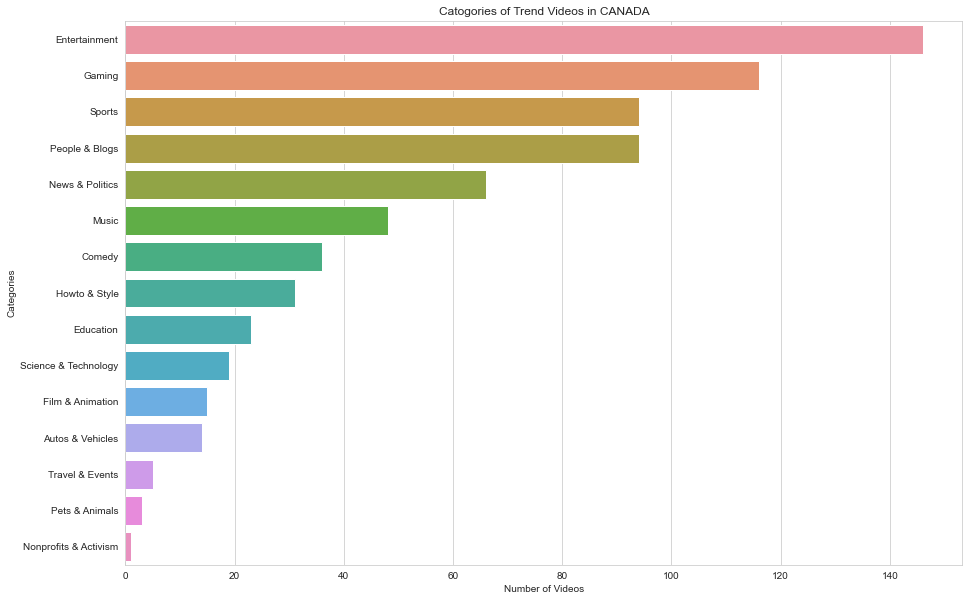

In [19]:
cat_df_ca = my_df[my_df['country']=='CA']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_ca['index'],x=cat_df_ca['category'], data=cat_df_ca,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of Trend Videos in CANADA")

# From Germany Users:

Text(0.5, 1.0, 'Catogories of Trend Videos in GERMANY')

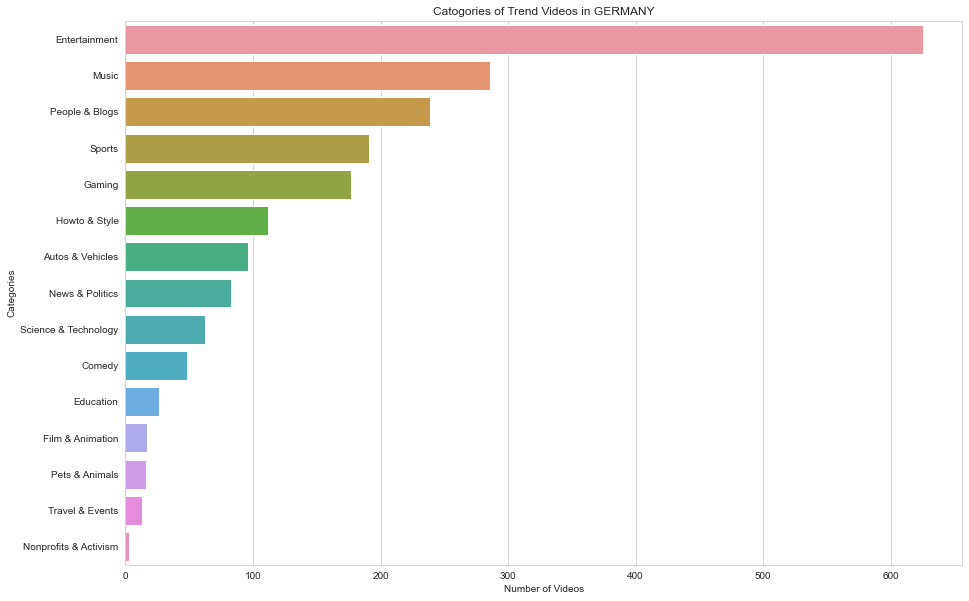

In [20]:
cat_df_de = my_df[my_df['country']=='DE']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_de['index'],x=cat_df_de['category'], data=cat_df_de,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of Trend Videos in GERMANY")

# From France Users:

Text(0.5, 1.0, 'Catogories of Trend Videos in FRANCE')

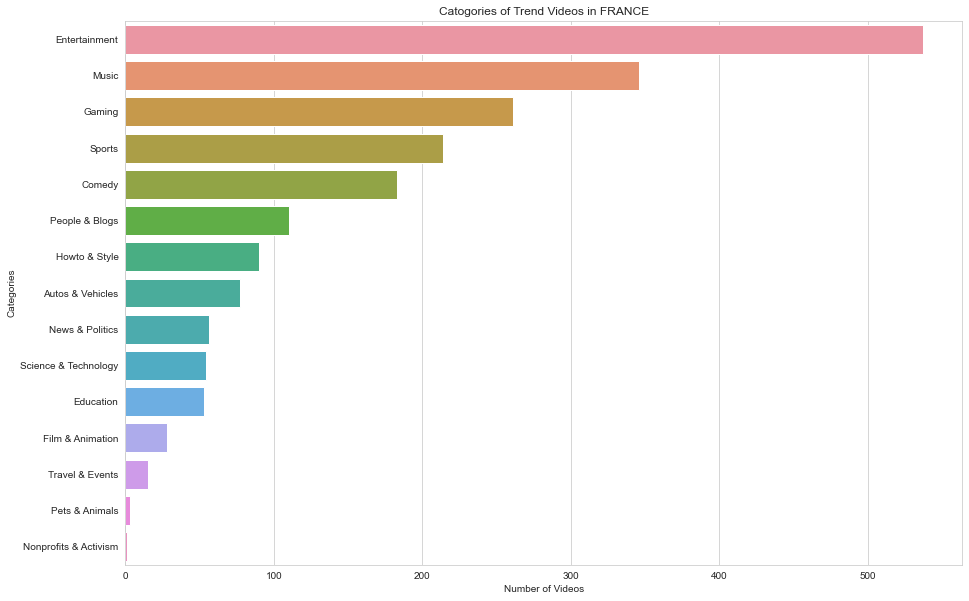

In [21]:
cat_df_fr = my_df[my_df['country']=='FR']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_fr['index'],x=cat_df_fr['category'], data=cat_df_fr,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of Trend Videos in FRANCE")

# From Korean Users:

Text(0.5, 1.0, 'Catogories of Trend Videos in KOREA')

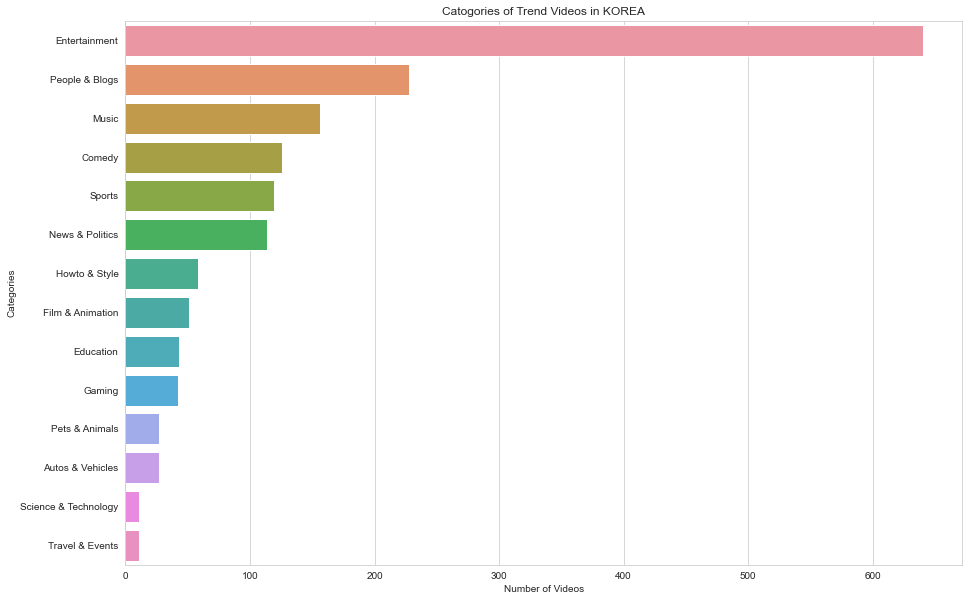

In [22]:
cat_df_fr = my_df[my_df['country']=='KR']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_fr['index'],x=cat_df_fr['category'], data=cat_df_fr,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of Trend Videos in KOREA")

# From Japanese Users:

Text(0.5, 1.0, 'Catogories of Trend Videos in JAPAN')

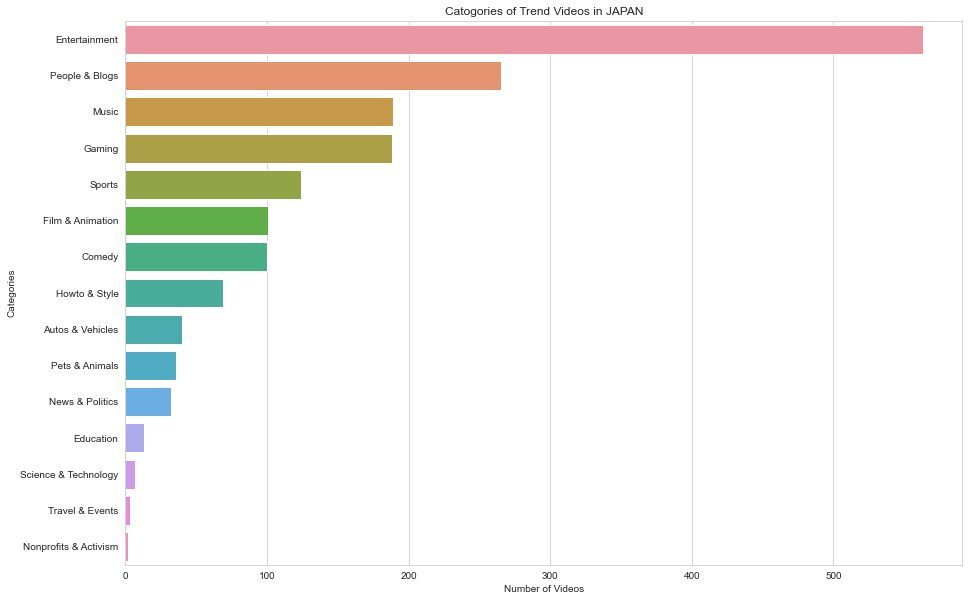

In [23]:
cat_df_fr = my_df[my_df['country']=='JP']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_fr['index'],x=cat_df_fr['category'], data=cat_df_fr,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of Trend Videos in JAPAN")

# From Mexico Users:

Text(0.5, 1.0, 'Catogories of Trend Videos in Mexico')

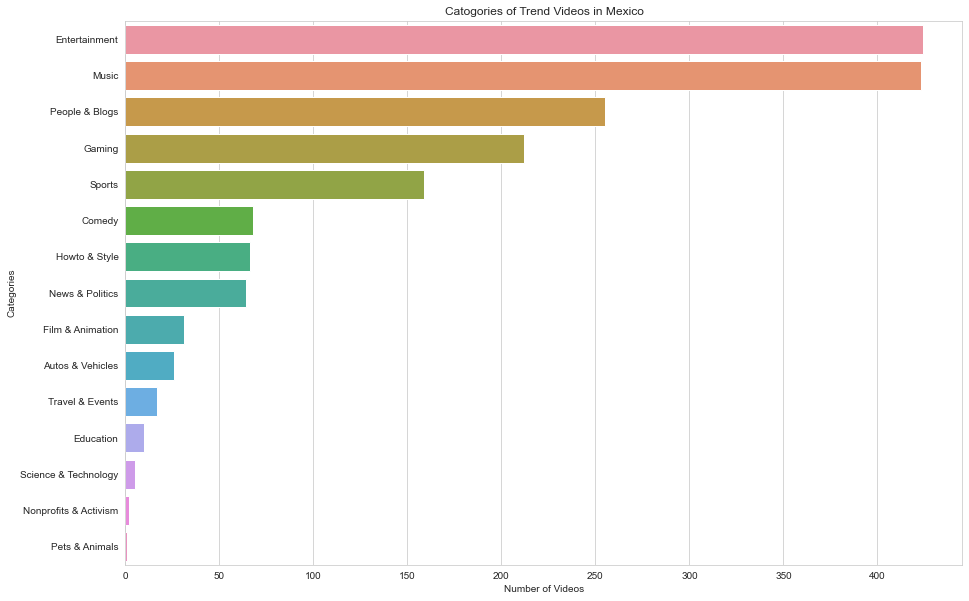

In [24]:
cat_df_fr = my_df[my_df['country']=='MX']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_fr['index'],x=cat_df_fr['category'], data=cat_df_fr,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of Trend Videos in Mexico")

# From Brazil Users:

Text(0.5, 1.0, 'Catogories of Trend Videos in Brazil')

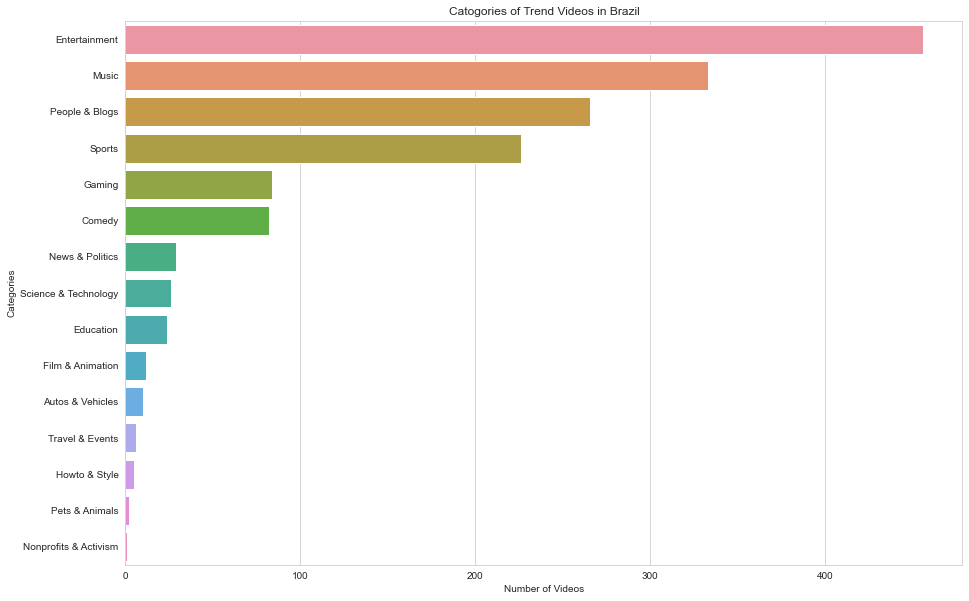

In [25]:
cat_df_fr = my_df[my_df['country']=='BR']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_fr['index'],x=cat_df_fr['category'], data=cat_df_fr,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of Trend Videos in Brazil")

# From India Users:

Text(0.5, 1.0, 'Catogories of Trend Videos in INDIA')

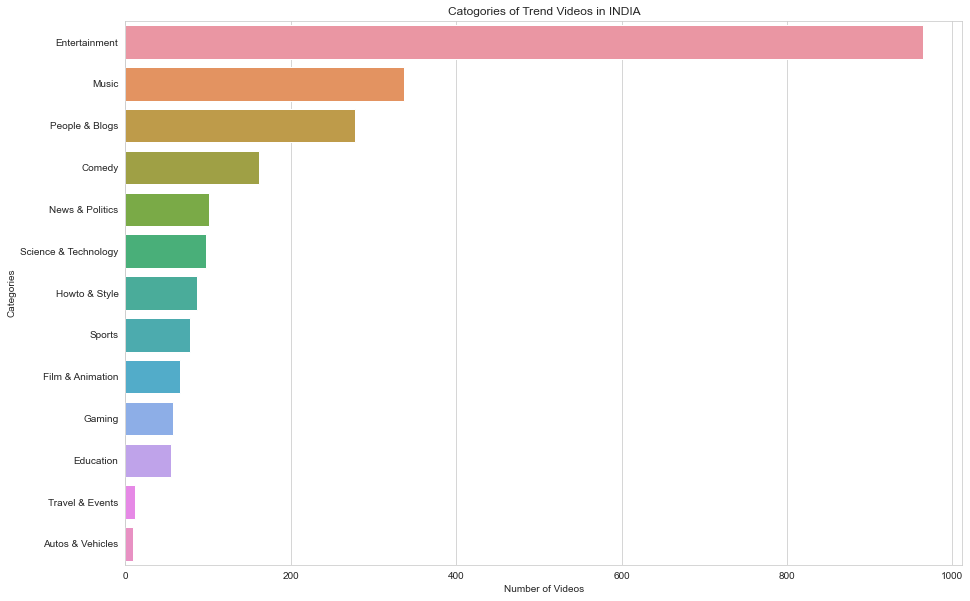

In [26]:
cat_df_fr = my_df[my_df['country']=='IN']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_fr['index'],x=cat_df_fr['category'], data=cat_df_fr,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of Trend Videos in INDIA")

# From Russia Users:

Text(0.5, 1.0, 'Catogories of Trend Videos in RUSSIA')

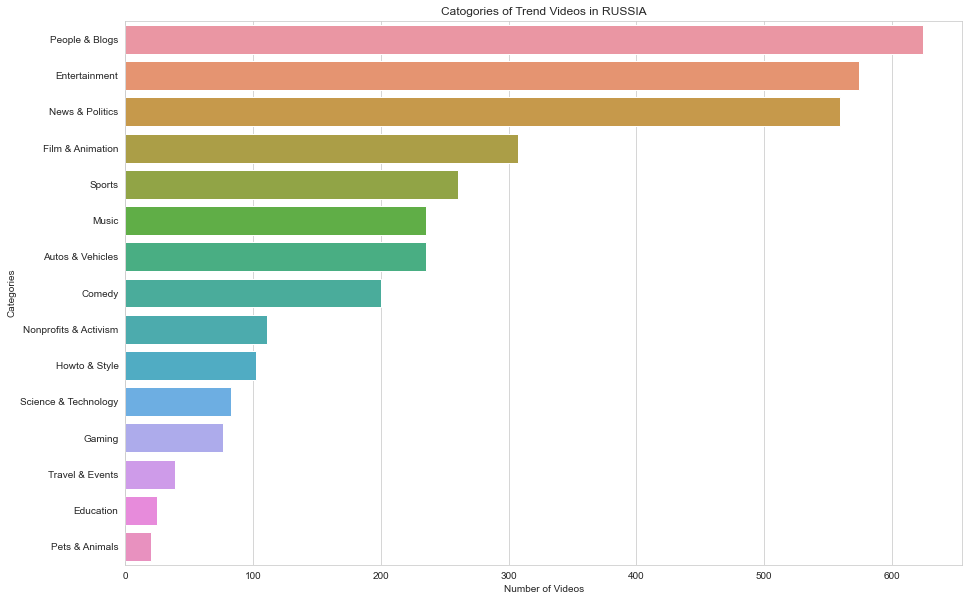

In [27]:
cat_df_fr = my_df[my_df['country']=='RU']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_fr['index'],x=cat_df_fr['category'], data=cat_df_fr,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of Trend Videos in RUSSIA")

## Observation:
1. Top category of all 5 countries is Entertainment.
2. Music's videos ranked insignificantly in Canada, Germany and France compare to US and UK.
3. Sport's videos are more popular in Canada, Germany and France.
4. All top 8 categories in United Kingdom entertainment-related, this might not be a good sign.
5. Show's and Activism's video get the bottom rank in all most countries.



# Analysis : Videos from which category has longer trend?

## Getting the days on trend for videos

In [28]:
publish_to_trend = {}
my_df_first = my_df_full.reset_index().drop_duplicates('video_id',keep ='first').set_index('video_id')
diff_first = (my_df_first['trending_date']).astype('datetime64[ns]')-my_df_first['publish_date'].astype('datetime64[ns]')

diff_first = diff_first.reset_index()
diff_first.columns = ['video_id','publish_to_trend']

for i, row in diff_first.iterrows():
    publish_to_trend[row['video_id']] = row['publish_to_trend'].days

my_df_last = my_df
diff_last = my_df['trending_date'].astype('datetime64[ns]')-my_df['publish_date'].astype('datetime64[ns]')
diff_last = diff_last.reset_index()
diff_last.columns = ['video_id','publish_to_trend_last']
my_df = my_df.reset_index()
my_df.insert(4,'publish_to_trend_last', diff_last['publish_to_trend_last'].astype('timedelta64[D]').astype(int))
my_df.insert(4, 'publish_to_trend', my_df['video_id'].map(publish_to_trend))
my_df.insert(4, 'trend_duration', 0)
my_df['trend_duration'] = (my_df['publish_to_trend_last']-my_df['publish_to_trend'])+1
my_df.set_index('video_id')[['publish_to_trend','trend_duration']].sort_values('trend_duration',ascending=False).head()

publish_to_trend  trend_duration
video_id                                    
DslHQto...          0                12     
MexmF5u...          1                12     
srWfDwi...          0                12     
CMbQv68...          1                12     
p3xs92l...          1                12

## Heatmap : Categories v/s Trending Duration

Text(0.5, 1.0, 'Category v/s Trending Duration')

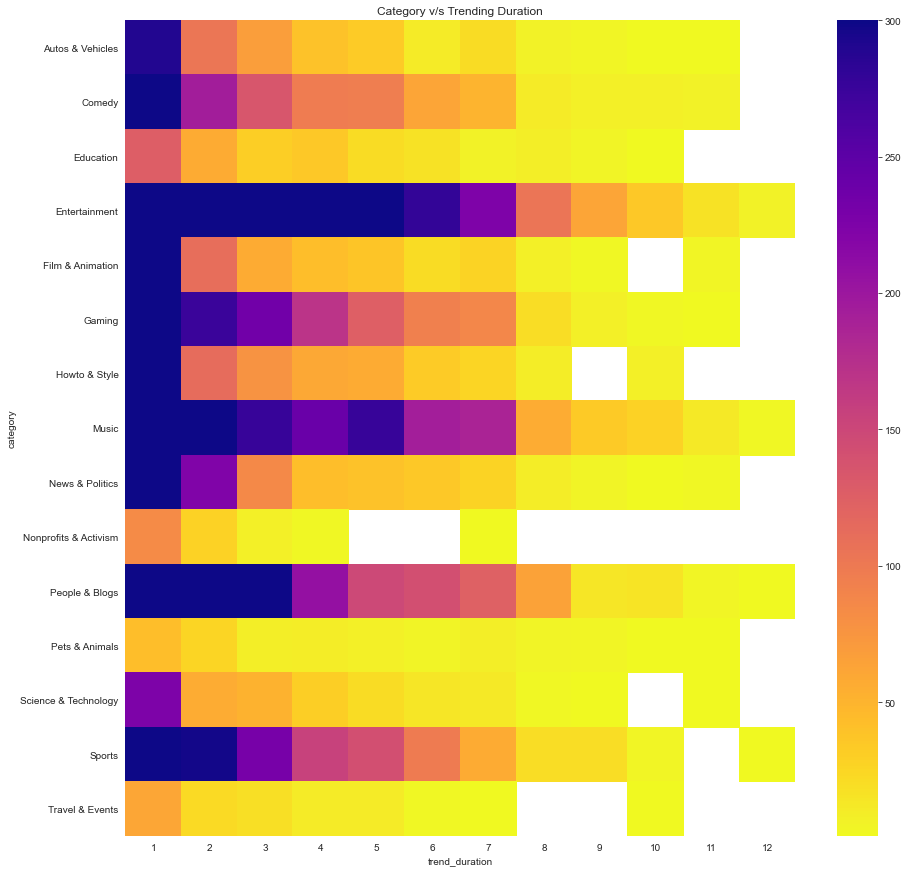

In [29]:
cat_trend_duration= my_df.groupby(['category','trend_duration']).count()['video_id'].unstack().clip(upper=300)
plt.figure(figsize=(15,15))#You can Arrange The Size As Per Requirement
sns.heatmap(cat_trend_duration, cmap='plasma_r')
plt.title("Category v/s Trending Duration")

We clip number larger than 300 to have better interpretation with smaller scale from (0 to 6000) -> (0 to 300). From the heatmap, we get the ranking of long trend categories:
1. Music
2. Entertainment
3. People & Blogs
4. Comedy
5. Sports, New & Politics and Howto & Style

# Analysis : Correlation between Days of Publish to Trend v/s Trending Duration?

## Heatmap : Days of Publish to Trend v/s Trending Duration

Text(0.5, 1.0, 'Correlation between Days from Publish v/s Trend and Trending Duration')

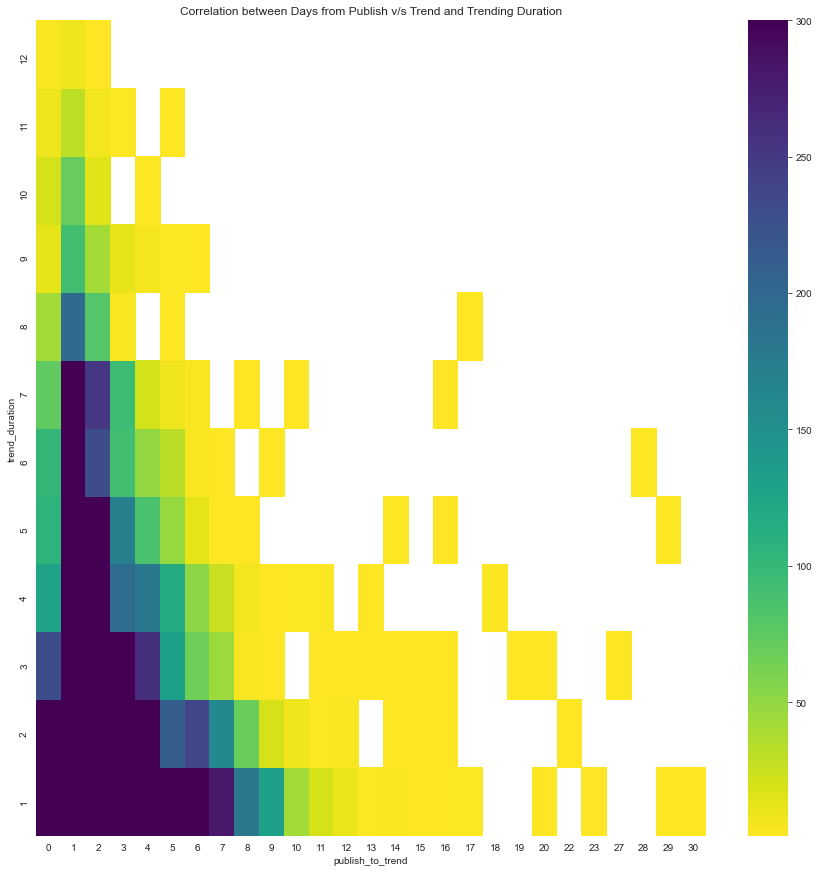

In [30]:
my_df['publish_to_trend'] = my_df['publish_to_trend'].clip(upper=365)
cat_trend_duration= my_df.groupby(['trend_duration','publish_to_trend']).count()['video_id'].unstack().clip(upper=300)
plt.figure(figsize=(15,15))
ax = sns.heatmap(cat_trend_duration, cmap='viridis_r')
ax.invert_yaxis()
plt.title("Correlation between Days from Publish v/s Trend and Trending Duration")

We clip the days from publish to trend for any number larger than 365  (0 to 4825) -> (0 to 365). Suprisingly, there are some videos take few years to be on trend. These are some obeservation:
1. The less days needed for a video from publish to trend, the longer the trend duration.
2. Videos that can get into trending within 5 days will have higher probability to be trending for longer time.


# Analysis : What is the ratio of Likes-Dislikes and Views-Comments in different categories?

## Likes-Dislikes Ratio

Text(0.5, 1.0, 'Likes-Dislikes Ratio')

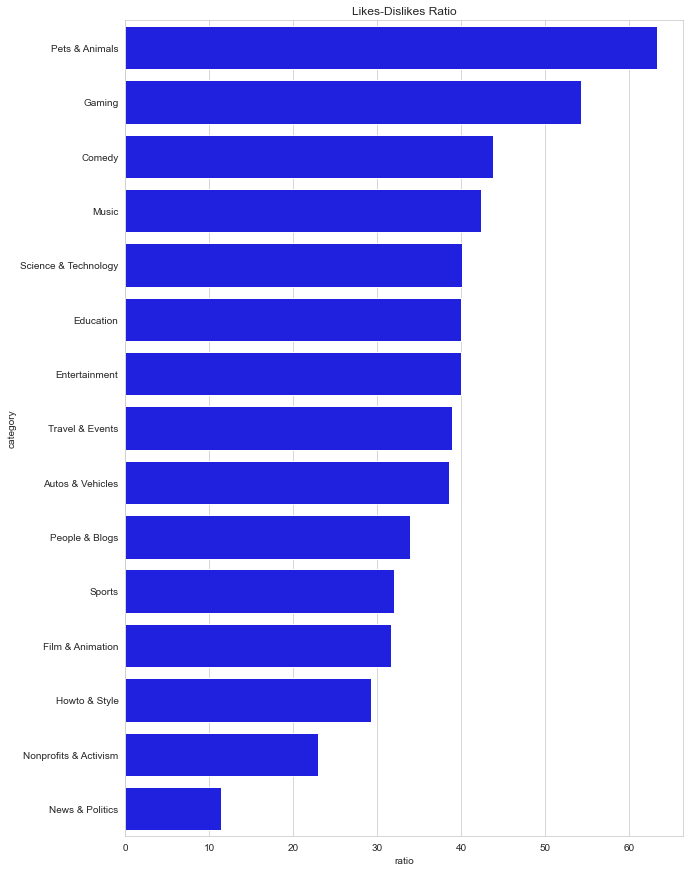

In [31]:
like_dislike_ratio = my_df.groupby('category')['likes'].agg('sum') / my_df.groupby('category')['dislikes'].agg('sum')
like_dislike_ratio = like_dislike_ratio.sort_values(ascending=False).reset_index()
like_dislike_ratio.columns = ['category','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="category", data=like_dislike_ratio,
            label="Likes-Dislikes Ratio", color="b")
plt.title("Likes-Dislikes Ratio")

## Views-Comments Ratio

Text(0.5, 1.0, 'Views-Comments Ratio')

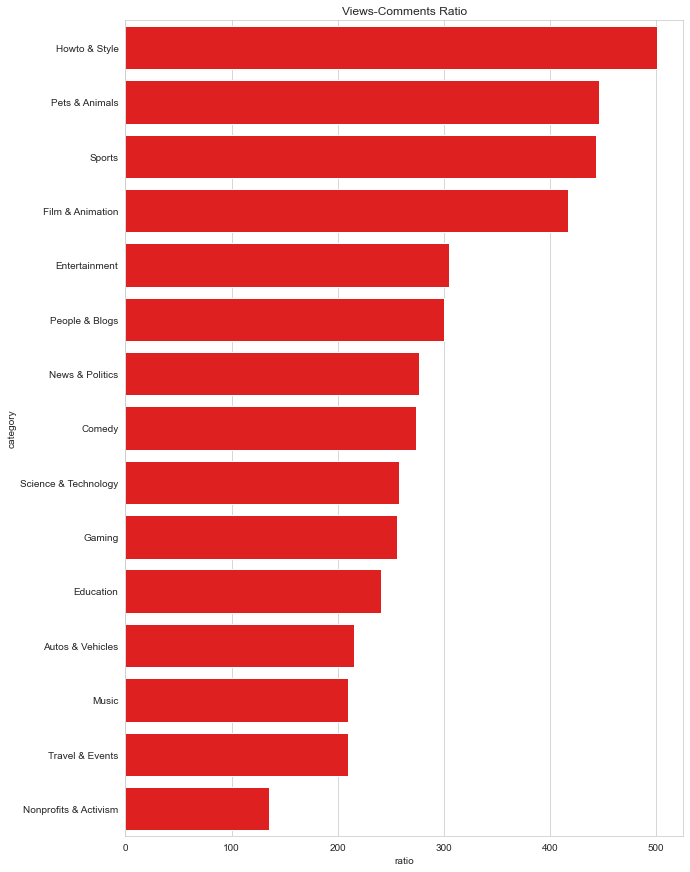

In [32]:
views_comment_ratio = my_df.groupby('category')['view_count'].agg('sum') / my_df.groupby('category')['comment_count'].agg('sum')
views_comment_ratio = views_comment_ratio.sort_values(ascending=False).reset_index()
views_comment_ratio.columns = ['category','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="category", data=views_comment_ratio,
            label="Views-Comments Ratio", color="r")
plt.title("Views-Comments Ratio")

## Dislikes-Views Ratio

Text(0.5, 1.0, 'Views-Dislike Ratio')

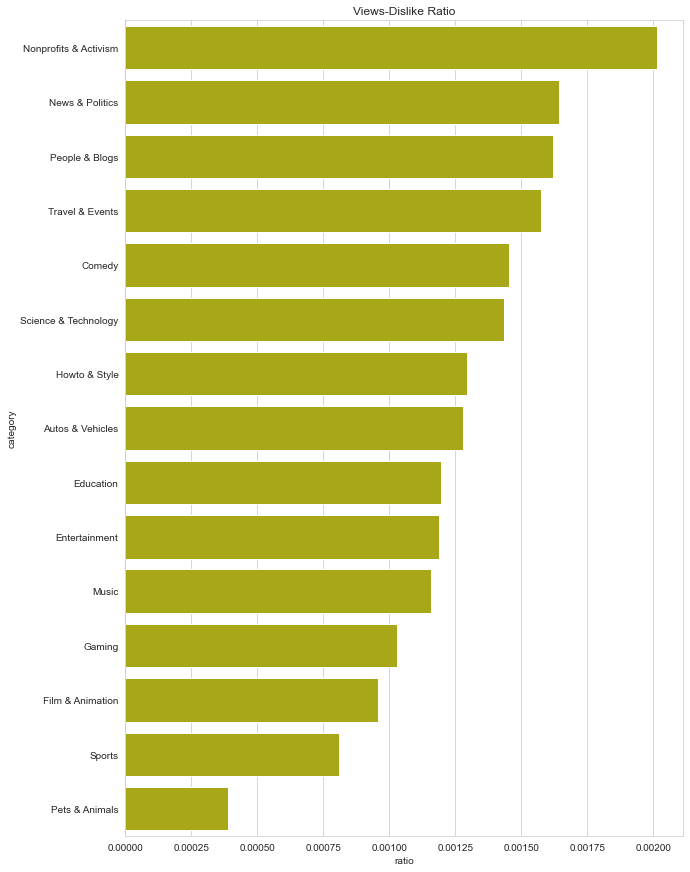

In [33]:
view_dislike_ratio = my_df.groupby('category')['dislikes'].agg('sum') / my_df.groupby('category')['view_count'].agg('sum')
view_dislike_ratio = view_dislike_ratio.sort_values(ascending=False).reset_index()
view_dislike_ratio.columns = ['category','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="category", data=view_dislike_ratio,
            label="Views-Dislikes Ratio", color="y")
plt.title("Views-Dislike Ratio")

## Likes-Views Ratio

Text(0.5, 1.0, 'Likes-Views Ratio')

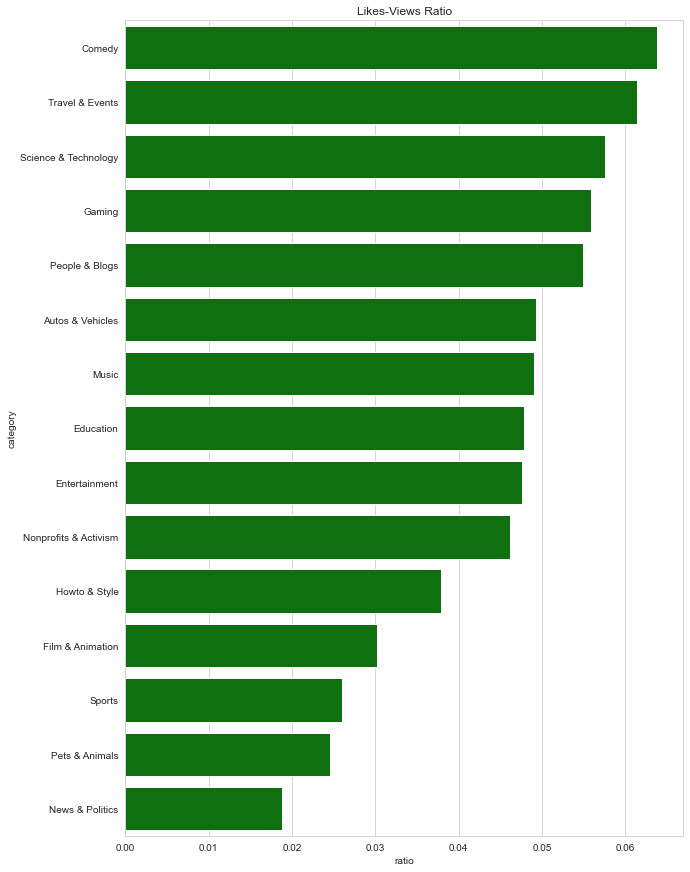

In [34]:
view_like_ratio = my_df.groupby('category')['likes'].agg('sum') / my_df.groupby('category')['view_count'].agg('sum')
view_like_ratio = view_like_ratio.sort_values(ascending=False).reset_index()
view_like_ratio.columns = ['category','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="category", data=view_like_ratio,
            label="Views-Likes Ratio", color="g")
plt.title("Likes-Views Ratio")

## Observation:

1. Pets & Animals videos have highest likes-dislikes ratio. Not surprisingly, people find difficult to hate pets and animals.

2. News & Politics videos have lowest likes-dislike ratio and views-comments ratio. People relatively hate these video and comment a lot.

3. Obviously, people still prefer implicit feedback than explicit. The ratio of views to comments is so large that only a comment written for hundreds of views.


# Analysis: Sentiment analysis on Video's tags 

## Import libraries

In [35]:
from wordcloud import WordCloud
import nltk
#nltk.download()
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re

Text(0.5, 1.0, 'Polarity of Categories in Youtube videos')

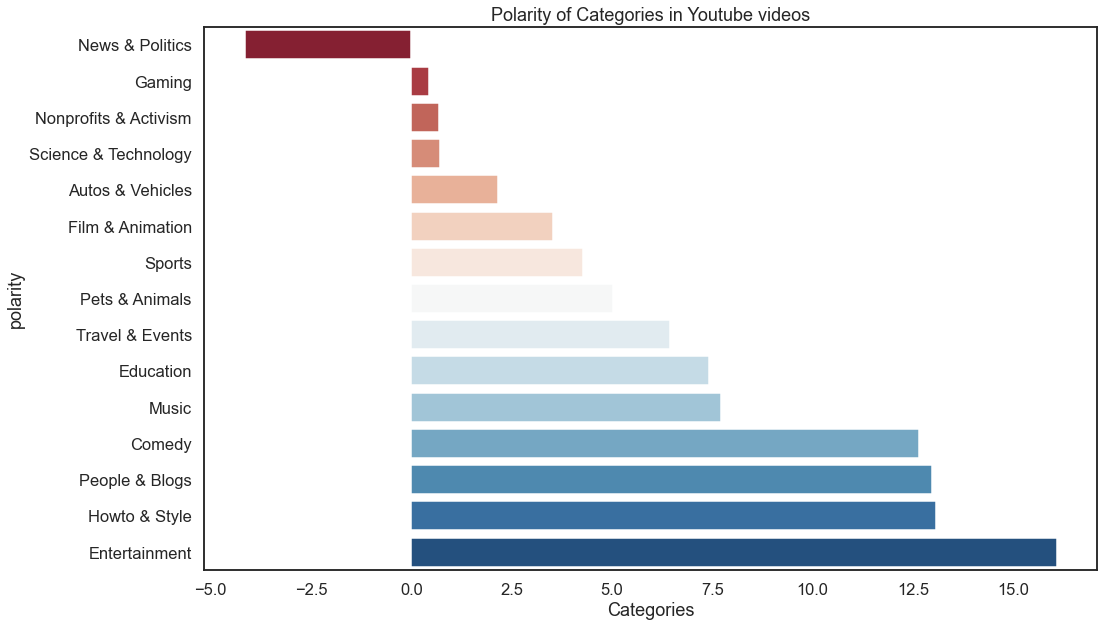

In [36]:
MAX_N = 1000

#remove all the stopwords from the text
en_stopwords = list(stopwords.words('korean'))
de_stopwords = list(stopwords.words('german'))   
fr_stopwords = list(stopwords.words('french'))   
mx_stopwords = list(stopwords.words('spanish')) 
br_stopwords = list(stopwords.words('portuguese')) 
ru_stopwords = list(stopwords.words('russian'))
kr_stopwords = list(stopwords.words('korean')) 
jp_stopwords = list(stopwords.words('japanese')) 
in_stopwords = list(stopwords.words('hindi')) 
en_stopwords.extend(de_stopwords)
en_stopwords.extend(fr_stopwords)
en_stopwords.extend(br_stopwords)
en_stopwords.extend(ru_stopwords)
en_stopwords.extend(mx_stopwords)
en_stopwords.extend(ru_stopwords)
en_stopwords.extend(kr_stopwords)
en_stopwords.extend(jp_stopwords)
en_stopwords.extend(in_stopwords)

polarities = list()

for cate in category_list:
    tags_word = my_df[my_df['category']==cate]['tags'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
    tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
    word_tokens = word_tokenize(tags_word)
    filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
    without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
    cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]      
    
# Calculate frequency distribution
    word_dist = nltk.FreqDist(cleaned_data_title)
    hnhk = pd.DataFrame(word_dist.most_common(MAX_N),
                    columns=['Word', 'Frequency'])

    compound = .0
    for word in hnhk['Word'].head(MAX_N):
        compound += SentimentIntensityAnalyzer().polarity_scores(word)['compound']

    polarities.append(compound)

category_list = pd.DataFrame(category_list)
polarities = pd.DataFrame(polarities)
tags_sentiment = pd.concat([category_list,polarities],axis=1)
tags_sentiment.columns = ['category','polarity']
tags_sentiment=tags_sentiment.sort_values('polarity').reset_index()

plt.figure(figsize=(16,10))
sns.set(style="white",context="talk")
ax = sns.barplot(x=tags_sentiment['polarity'],y=tags_sentiment['category'], data=tags_sentiment,orient='h',palette="RdBu")
plt.xlabel("Categories")
plt.ylabel("polarity")
plt.title("Polarity of Categories in Youtube videos")

By using sentiment analyzer from NLTK, we can examine the polarities of tags from all Youtube Trending Videos. All the 1000 most frequent tag from each categories were examined and result in form of number. *NEGATIVE* values indicate that most of the tags have negative sentiment and *POSITIVE* in contrast. However, I did not expected New & Politics videos to have most negative sentiment with its tags.

# Analysis : What's the tags in the most negative and most positive category? What's the most discuss words for News and Politics? Entertainment?

In [37]:
def wcloud(data,bgcolor):
    plt.figure(figsize = (20,15))
    cloud = WordCloud(background_color = bgcolor, max_words = 100,  max_font_size = 50)
    cloud.generate(' '.join(data))
    plt.imshow(cloud)
    plt.axis('off')

## News & Politics

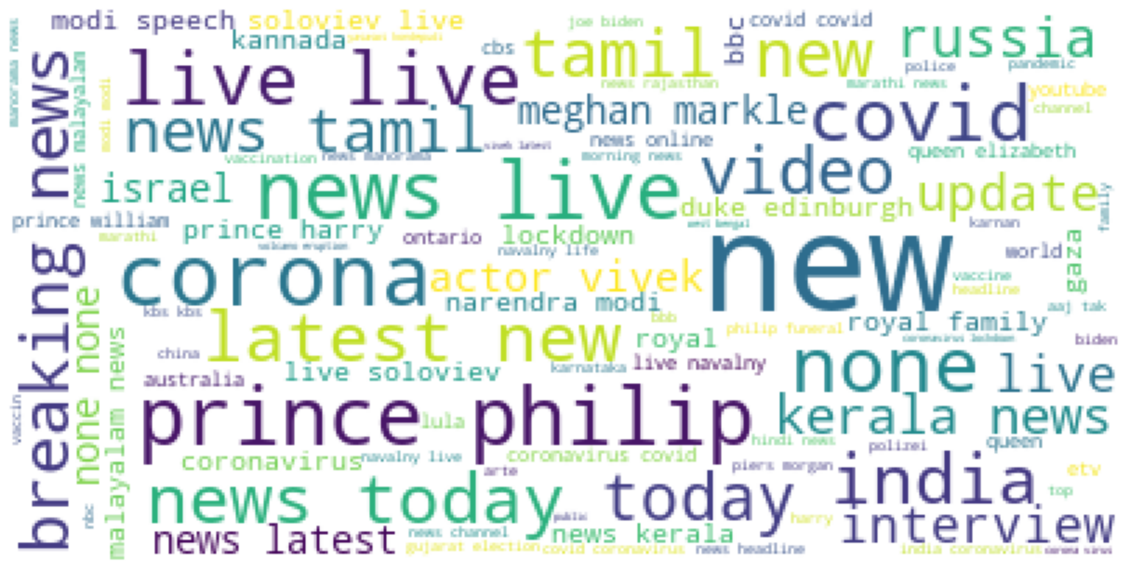

In [38]:
tags_word = my_df[my_df['category']=='News & Politics']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

## People & Blogs

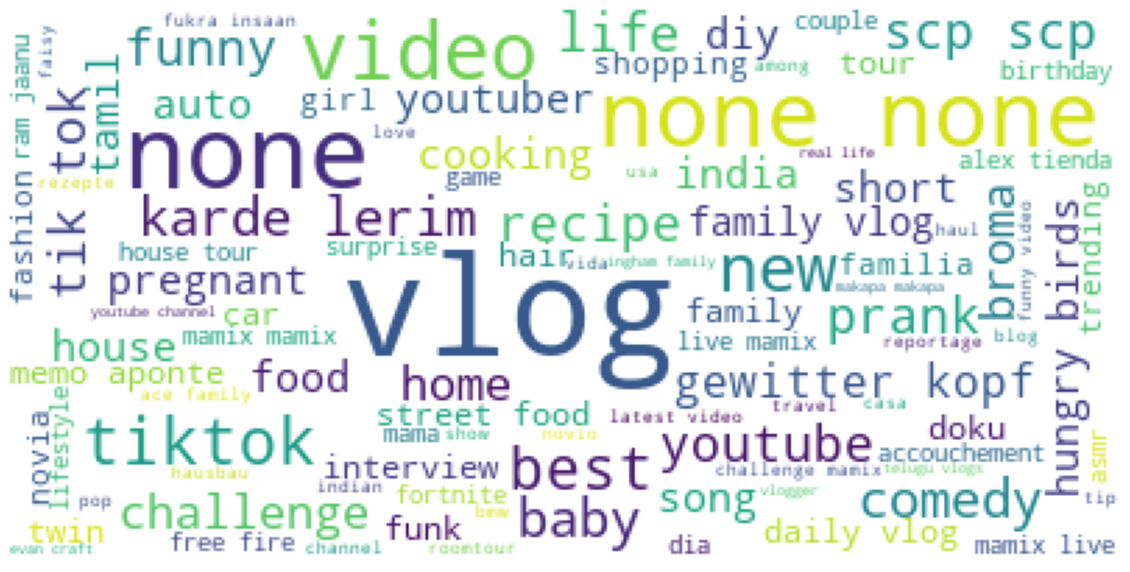

In [39]:
tags_word = my_df[my_df['category']=='People & Blogs']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

## Science & Technology

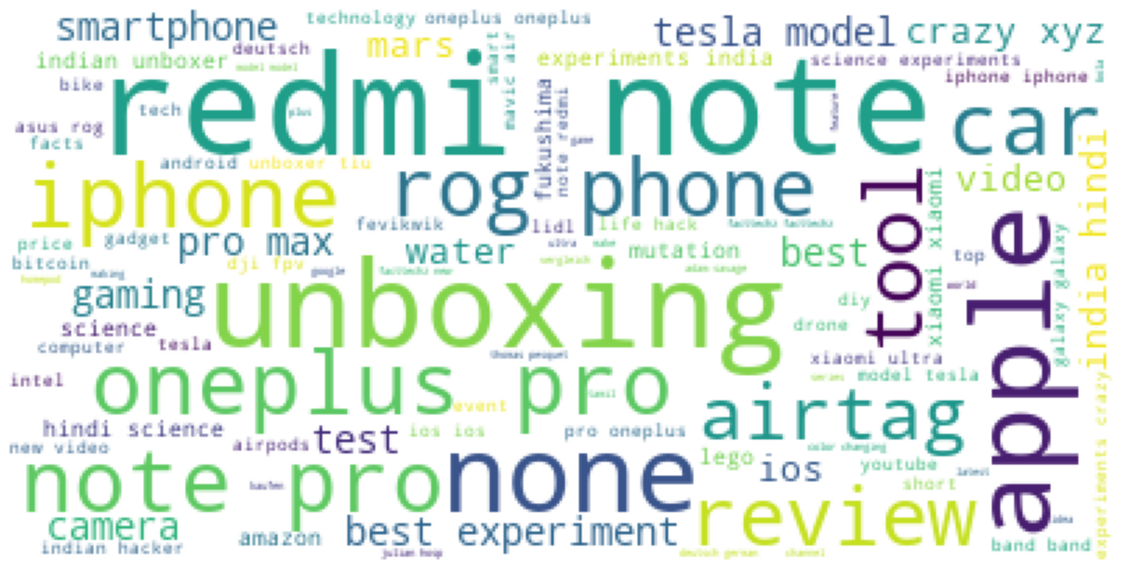

In [40]:
tags_word = my_df[my_df['category']=='Science & Technology']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

## Film & Animation

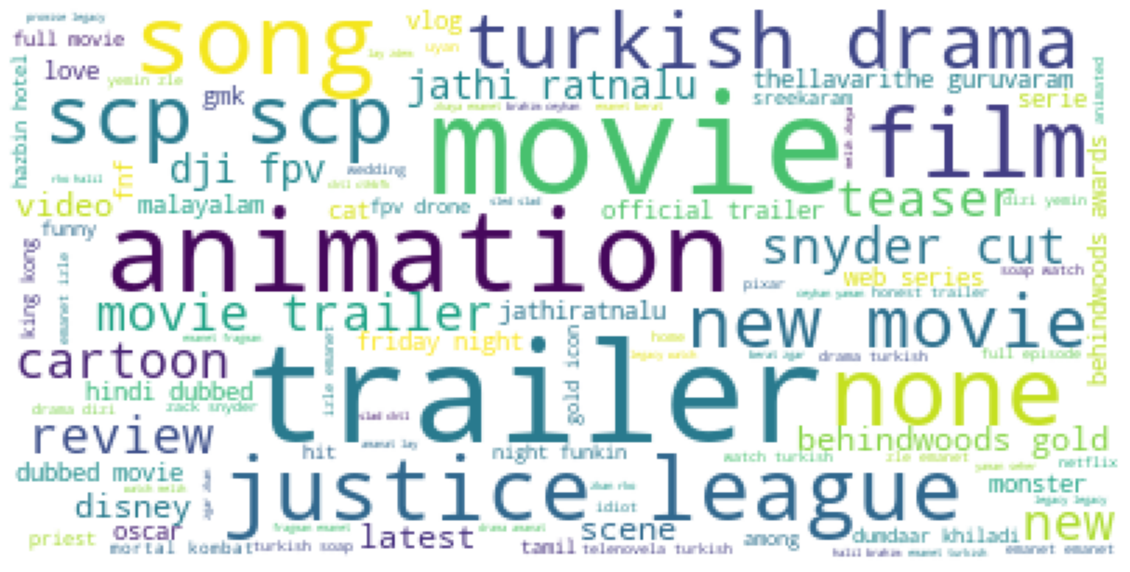

In [41]:
tags_word = my_df[my_df['category']=='Film & Animation']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

## Entertainment

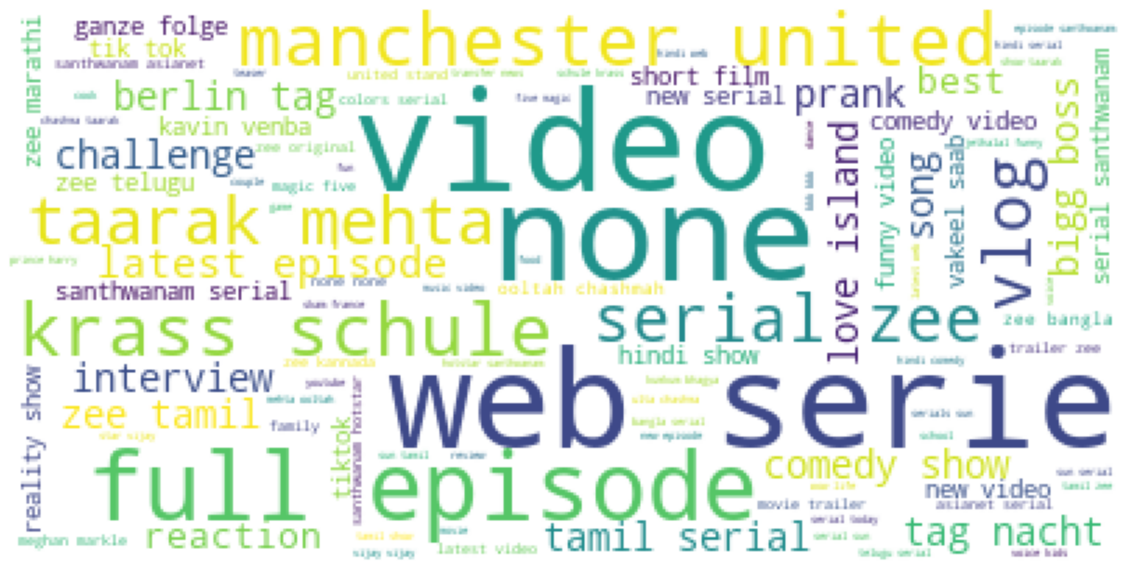

In [42]:
tags_word = my_df[my_df['category']=='Entertainment']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

## Sports

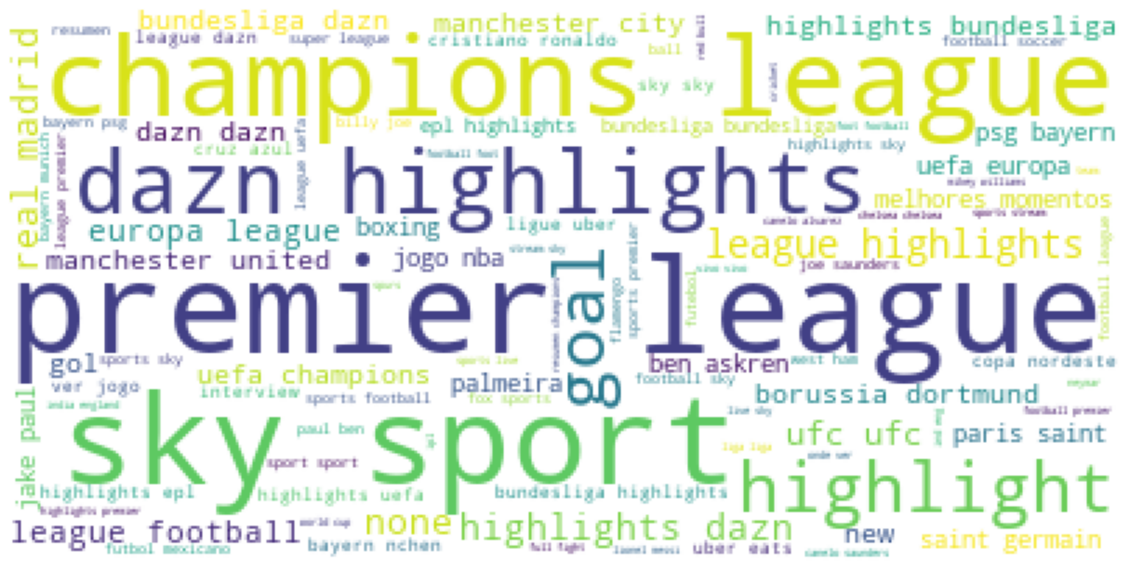

In [43]:
tags_word = my_df[my_df['category']=='Sports']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

## Autos & Vehicles

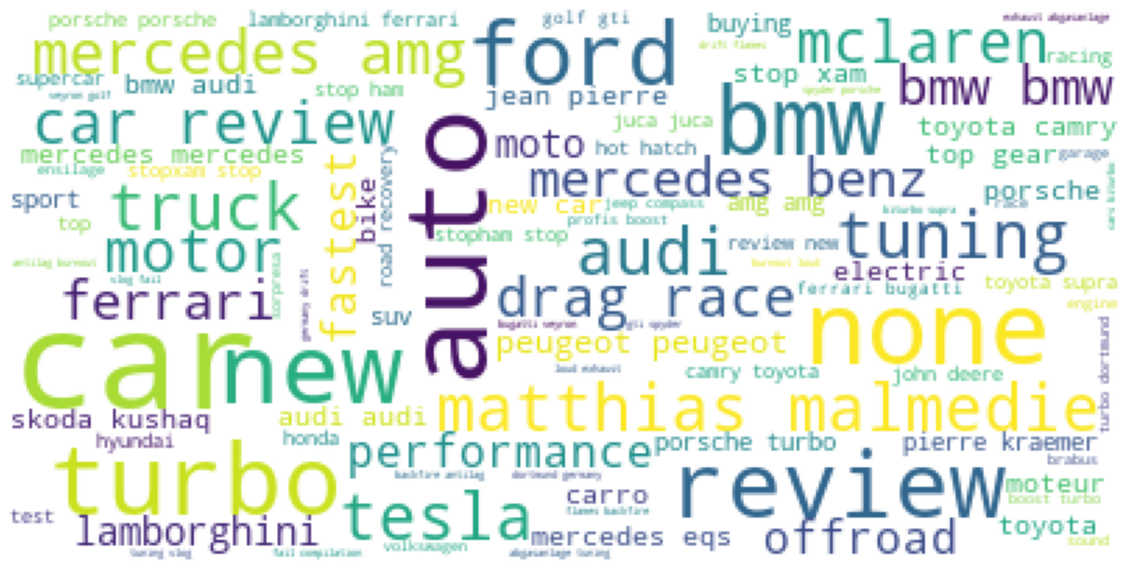

In [44]:
tags_word = my_df[my_df['category']=='Autos & Vehicles']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

## Gaming

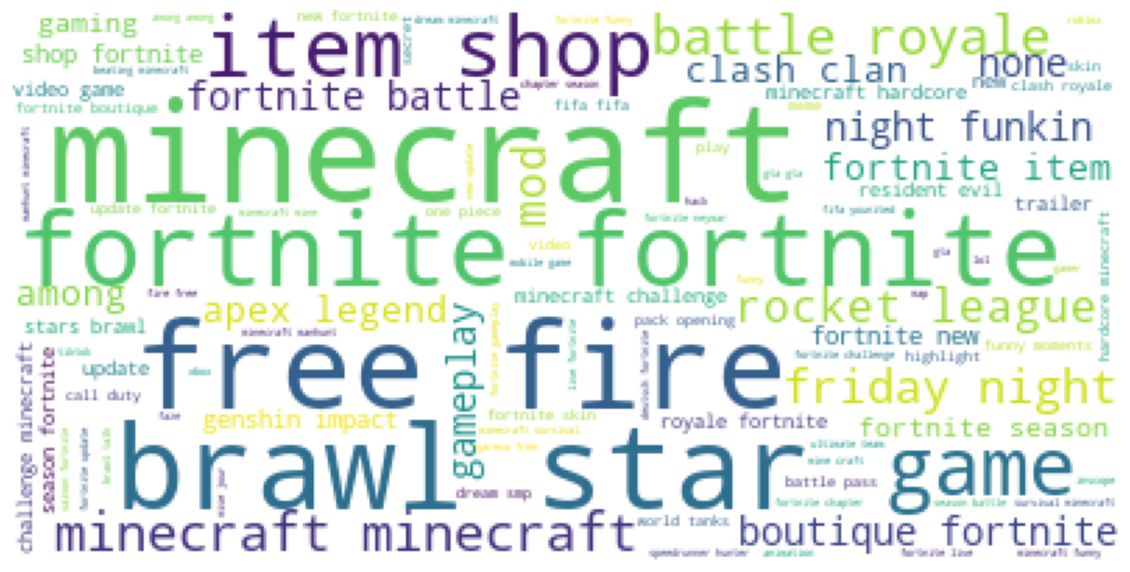

In [45]:
tags_word = my_df[my_df['category']=='Gaming']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

## Music

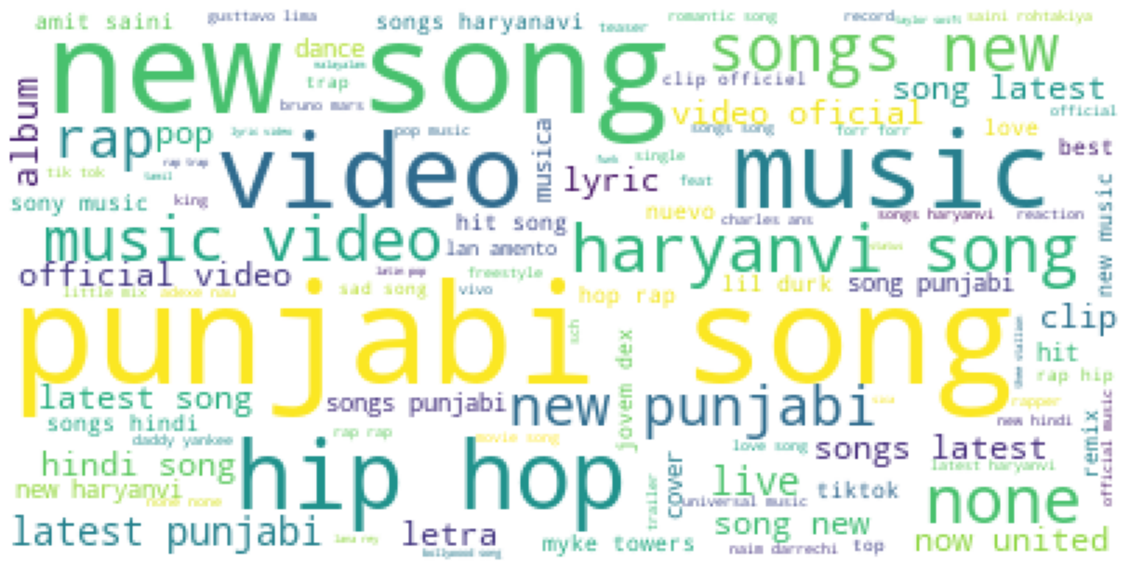

In [46]:
tags_word = my_df[my_df['category']=='Music']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

## Comedy

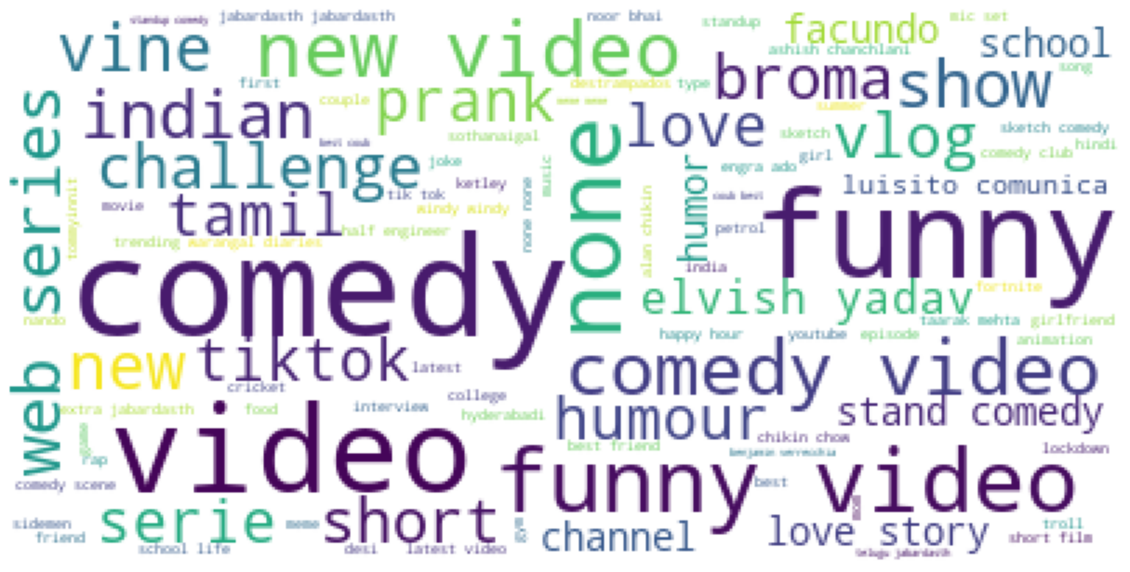

In [47]:
tags_word = my_df[my_df['category']=='Comedy']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

## Education

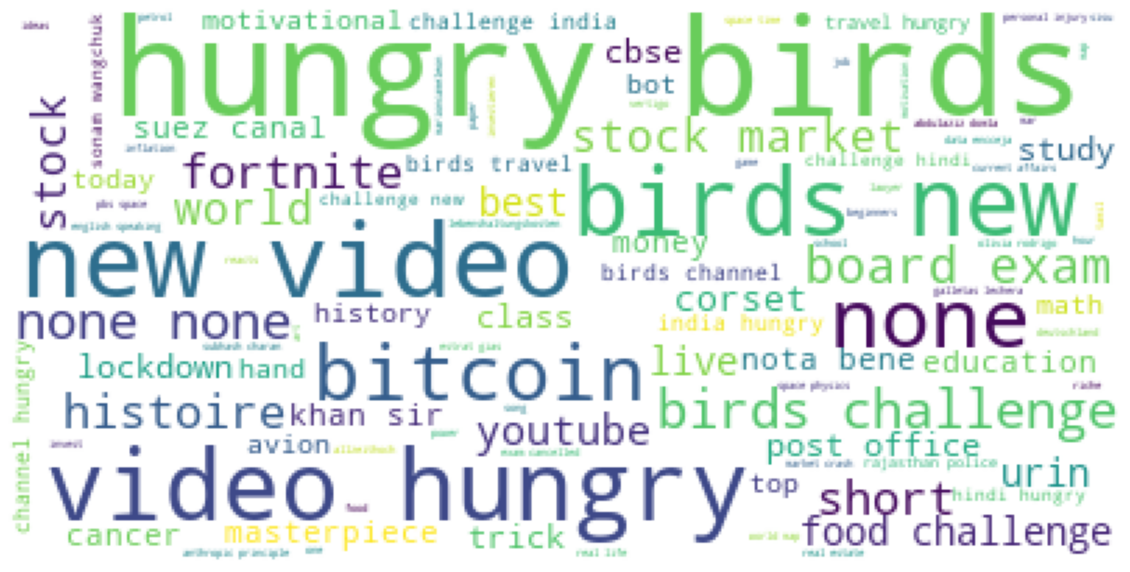

In [48]:
tags_word = my_df[my_df['category']=='Education']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')